In [ ]:
'''CL3-ASS-10: Implement Ant colony optimization by solving the Traveling salesman problem using
python Problem statement- A salesman needs to visit a set of cities exactly once and
return to the original city. The task is to find the shortest possible route that the salesman
can take to visit all the cities and return to the starting city. '''

Iteration 1: Best Distance = 222.60
Iteration 2: Best Distance = 222.60
Iteration 3: Best Distance = 222.60
Iteration 4: Best Distance = 222.60
Iteration 5: Best Distance = 222.60
Iteration 6: Best Distance = 222.60
Iteration 7: Best Distance = 222.60
Iteration 8: Best Distance = 222.60
Iteration 9: Best Distance = 222.60
Iteration 10: Best Distance = 222.60
Iteration 11: Best Distance = 222.60
Iteration 12: Best Distance = 222.60
Iteration 13: Best Distance = 222.60
Iteration 14: Best Distance = 222.60
Iteration 15: Best Distance = 222.60
Iteration 16: Best Distance = 222.60
Iteration 17: Best Distance = 222.60
Iteration 18: Best Distance = 222.60
Iteration 19: Best Distance = 222.60
Iteration 20: Best Distance = 222.60
Iteration 21: Best Distance = 222.60
Iteration 22: Best Distance = 222.60
Iteration 23: Best Distance = 222.60
Iteration 24: Best Distance = 222.60
Iteration 25: Best Distance = 222.60
Iteration 26: Best Distance = 222.60
Iteration 27: Best Distance = 222.60
Iteration 

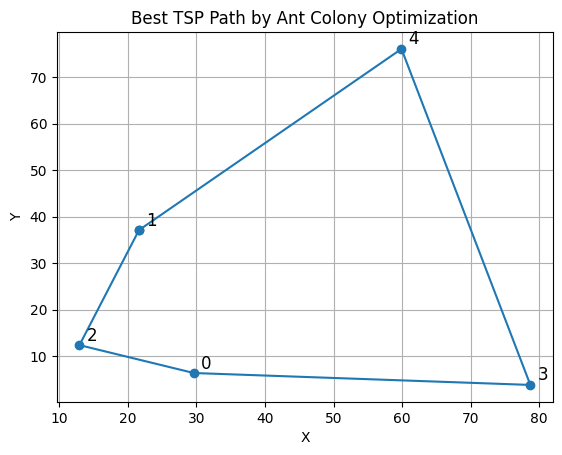

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# ----- Problem Setup -----
num_cities = 5
coordinates = np.random.rand(num_cities, 2) * 100  # Random 2D coordinates for cities
distances = np.zeros((num_cities, num_cities))

# Calculate distance matrix
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distances[i][j] = np.linalg.norm(coordinates[i] - coordinates[j])

# ----- ACO Parameters -----
num_ants = 10
num_iterations = 100
alpha = 1.0        # pheromone importance
beta = 5.0         # distance priority
evaporation_rate = 0.5
Q = 100  # constant for pheromone update

pheromones = np.ones((num_cities, num_cities))

best_distance = float('inf')
best_path = None

# ----- Main ACO Loop -----
for iteration in range(num_iterations):
    all_paths = []
    all_distances = []

    for ant in range(num_ants):
        unvisited = list(range(num_cities))
        path = [unvisited.pop(random.randint(0, num_cities - 1))]

        while unvisited:
            current = path[-1]
            probabilities = []

            for city in unvisited:
                pheromone = pheromones[current][city] ** alpha
                visibility = (1 / distances[current][city]) ** beta
                probabilities.append(pheromone * visibility)

            probabilities = probabilities / np.sum(probabilities)
            next_city = random.choices(unvisited, weights=probabilities)[0]
            path.append(next_city)
            unvisited.remove(next_city)

        path.append(path[0])  # return to start
        total_distance = sum(distances[path[i]][path[i + 1]] for i in range(num_cities))
        all_paths.append(path)
        all_distances.append(total_distance)

        if total_distance < best_distance:
            best_distance = total_distance
            best_path = path

    # Pheromone update
    pheromones *= (1 - evaporation_rate)
    for i, path in enumerate(all_paths):
        for j in range(num_cities):
            from_city = path[j]
            to_city = path[j + 1]
            pheromones[from_city][to_city] += Q / all_distances[i]
            pheromones[to_city][from_city] += Q / all_distances[i]

    print(f"Iteration {iteration+1}: Best Distance = {best_distance:.2f}")

# ----- Final Result -----
print("\nBest Path:", best_path)
print("Shortest Distance:", best_distance)

# Optional: Plot the best path
x = [coordinates[i][0] for i in best_path]
y = [coordinates[i][1] for i in best_path]

plt.plot(x, y, marker='o')
for i, (x0, y0) in enumerate(coordinates):
    plt.text(x0 + 1, y0 + 1, str(i), fontsize=12)
plt.title("Best TSP Path by Ant Colony Optimization")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()
